In [1]:
#@title Import
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Dataset

In [2]:
df_games = pd.read_csv("/content/drive/MyDrive/KASDD/Dataset/games.csv")
df_matches = pd.read_csv("/content/drive/MyDrive/KASDD/Dataset/matches.csv")
df_scoreboard = pd.read_csv("/content/drive/MyDrive/KASDD/Dataset/scoreboard.csv")

In [3]:
display(df_games.head(1))
display(df_matches.head(1))
display(df_scoreboard.head(1))

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7


,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0


## Cleaning Dataset

In [4]:
df_games = df_games.drop_duplicates()
df_matches = df_matches.drop_duplicates()
df_scoreboard = df_scoreboard.drop_duplicates()

In [5]:
df_scoreboard[df_scoreboard.ACS.isnull() | (df_scoreboard.ACS == 0 & df_scoreboard.PlusMinus.isnull()) | df_scoreboard.OnevOne.isnull()]

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
2869,60217,2396.0,ShoukR,BBG.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,60217,4384.0,khanartist,BBG.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,60217,4385.0,monSi,BBG.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2872,60217,8078.0,BlackHeart,BBG.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2873,60217,10053.0,FireBallOps,BBG.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157934,13,24.0,Gover,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157935,13,25.0,Jack1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157936,13,26.0,Rewind,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157937,13,27.0,Woo1y,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#@title Remove null in scoreboards
a = list(df_scoreboard[df_scoreboard.ACS.isnull() | (df_scoreboard.ACS == 0 & df_scoreboard.PlusMinus.isnull()) | df_scoreboard.OnevOne.isnull()].GameID.unique())
b = list(df_games[df_games.Team1_Eco.isnull()].GameID.unique())
null_games = list(set(a).union(set(b)))

df_clean_score = df_scoreboard.drop(df_scoreboard[df_scoreboard['GameID'].isin(null_games)].index)
df_clean_games = df_games.drop(df_games[df_games['GameID'].isin(null_games)].index)

In [7]:
#@title Remove incomplete members

temp = df_clean_score.groupby(by='GameID', as_index=False).count()
temp = temp[temp['Agent'] != 10]

df_clean_score = df_clean_score.drop(df_clean_score[df_clean_score['GameID'].isin(temp.GameID)].index)
df_clean_games =  df_clean_games.drop(df_clean_games[df_clean_games['GameID'].isin(temp.GameID)].index)

In [8]:
#@title Remove rows in the games table that don't have a GameID in the scoreboards table.
A = set(df_clean_games.GameID.values)
B = set(df_clean_score.GameID.values)
df_clean_games = df_clean_games[~df_clean_games['GameID'].isin(A-B)]

In [9]:
#@title Synchronize the Team Abbreviation with the Team Name so that they can be joined.
df_clean_score = df_clean_score.reset_index(drop=True)
df_clean_games =  df_clean_games.reset_index(drop=True)

counter = 0
for i in range(len(df_clean_games)):
  game_Id = df_clean_games.iloc[i]
  for k in range(counter, counter+5):
    df_clean_score.at[k, 'TeamAbbreviation'] = game_Id['Team1']
  counter += 5
  for k in range(counter, counter+5):
    df_clean_score.at[k, 'TeamAbbreviation'] = game_Id['Team2']
  counter += 5
df_clean_score = df_clean_score.rename(columns={'TeamAbbreviation':'TeamName'})

In [10]:
#@title Handle missing values in scoreboard
print(df_clean_score.isnull().sum() * 100 / len(df_clean_score))
df_clean_score = df_clean_score.drop(columns=['KAST_Percent', 'PlayerID'])

GameID             0.000000
PlayerID           0.011586
PlayerName         0.000000
TeamName           0.000000
Agent              0.000000
ACS                0.000000
Kills              0.000000
Deaths             0.000000
Assists            0.000000
PlusMinus          0.000000
KAST_Percent      97.737341
ADR                0.000000
HS_Percent         0.000000
FirstKills         0.000000
FirstDeaths        0.000000
FKFD_PlusMinus     0.000000
Num_2Ks            0.000000
Num_3Ks            0.000000
Num_4Ks            0.000000
Num_5Ks            0.000000
OnevOne            0.000000
OnevTwo            0.000000
OnevThree          0.000000
OnevFour           0.000000
OnevFive           0.000000
Econ               0.000000
Plants             0.000000
Defuses            0.000000
dtype: float64


# EDA

## What is the Agent usage distribution across patches 1.X, 2.X, and 3.X? Are there any agents with decreasing usage across patches?

In [11]:
df_matches.Patch.unique()

array(['Patch 3.12', nan, 'Patch 3.10', 'Patch 3.09', 'Patch 3.07',
       'Patch 3.08', 'Patch 3.06', 'Patch 3.05', 'Patch 3.04',
       'Patch 3.02', 'Patch 3.03', 'Patch 3.01', 'Patch 3.0',
       'Patch 2.09', 'Patch 2.11', 'Patch 2.07',
       'Patch 2.08Breeze added; Coaching slots ',
       'Patch 2.06Viper and Yoru buffsHRTF Audio ', 'Patch 2.05',
       'Patch 2.04Added Astra ',
       'Patch 2.03Added Marshal, Yoru, Reyna tweaks ',
       'Patch 2.02Running accuracy changes ',
       'Patch 2.01Split overhaul patch ',
       'Patch 2.0Added YoruAdded Brimstone buffsAdded Omen, Classic nerfs ',
       'Patch 1.14Changes to Icebox, Sage, and spectating. ',
       'Patch 1.12Minor updates to observing ',
       'Patch 1.11Added Skye; added Icebox to map rotationAdded Cypher and Killjoy nerfs ',
       'Patch 1.10Icebox map beta, QoL improvements ',
       'Patch 1.09Operator nerfs, Agent tweaksJump accuracy changes ',
       'Patch 1.08Guardian buffs, Raze changes ',
       'Pat

In [12]:
df_matches.isna().sum()

MatchID             0
Date                0
Patch             475
EventID             0
EventName           0
EventStage          0
Team1ID             0
Team2ID             0
Team1               0
Team2               0
Team1_MapScore      0
Team2_MapScore      0
dtype: int64

In [67]:
#@title Grouping Mayor Patch
df_clean_matches = df_matches.dropna()
agent_df = df_clean_score[['GameID', 'Agent']]
agent_df['Version'] = 0

for i in range(1,4):
  patch = df_clean_matches[df_clean_matches['Patch'].str.contains(f'Patch {i}.')]
  games = df_clean_games[df_clean_games['MatchID'].isin(patch.MatchID)]
  agent_df.loc[agent_df['GameID'].isin(games.GameID), 'Version'] = i

agent_df = agent_df[agent_df['Version'] != 0]
version_df = agent_df[['Agent', 'Version']].groupby(by=['Agent'], as_index=False).nunique()
version_df = version_df[version_df['Version'] != 1]
agent_df = agent_df[agent_df['Agent'].isin(version_df['Agent'].unique())].sort_values(by=['Agent'])

agent_df.head(3)

<ipython-input-67-774ff7137816>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Version'] = 0


,GameID,Agent,Version
20899,54062,astra,3
29458,50744,astra,3
64114,34868,astra,2


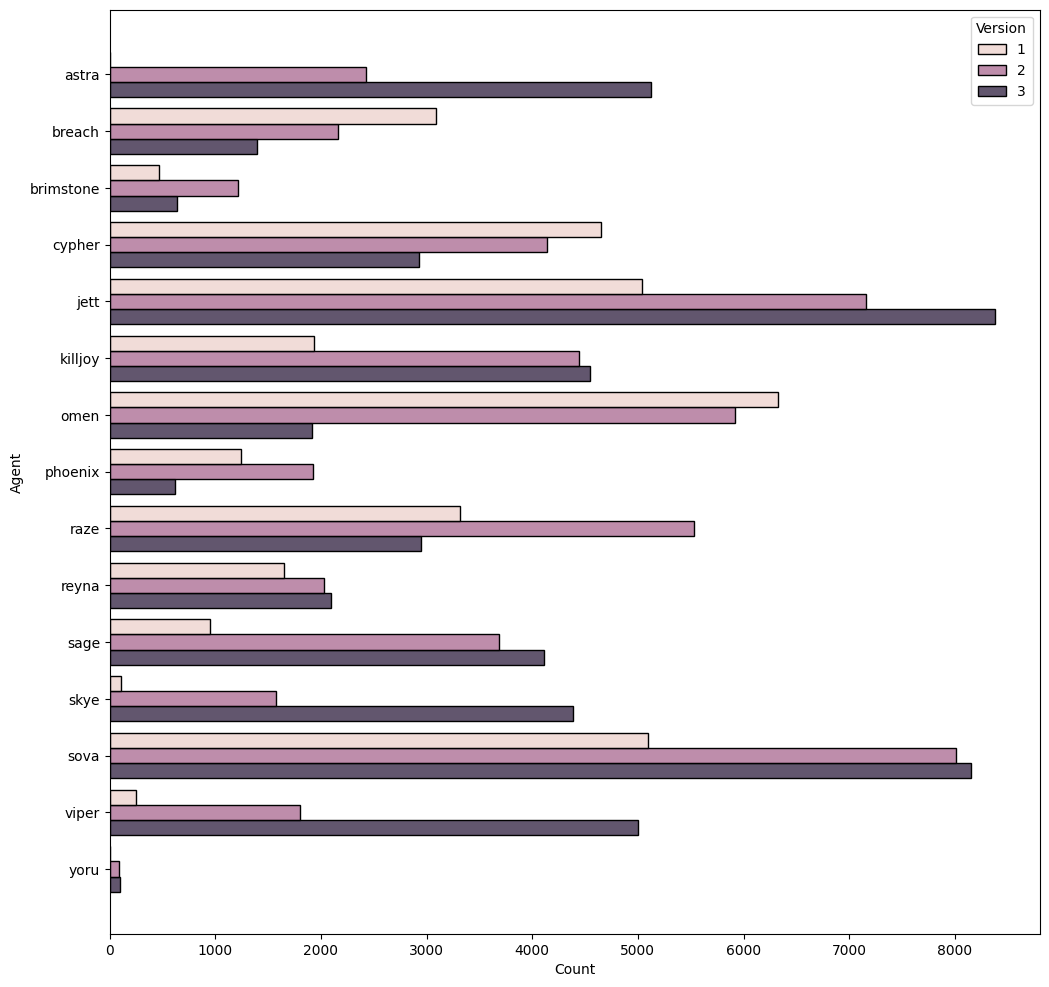

In [68]:
#@title Count Agent Usage
#@markdown Some agents have experienced a high increase in usage, such as Astra, Jett, Skye, and Sova.
#@markdown Other agents have experienced a decrease in usage, such as Breach, Cypher, and Omen.

fig, ax = plt.subplots(figsize=(12, 12))
sns.histplot(data=agent_df, y='Agent', hue='Version', multiple='dodge', shrink=0.8)
plt.show()

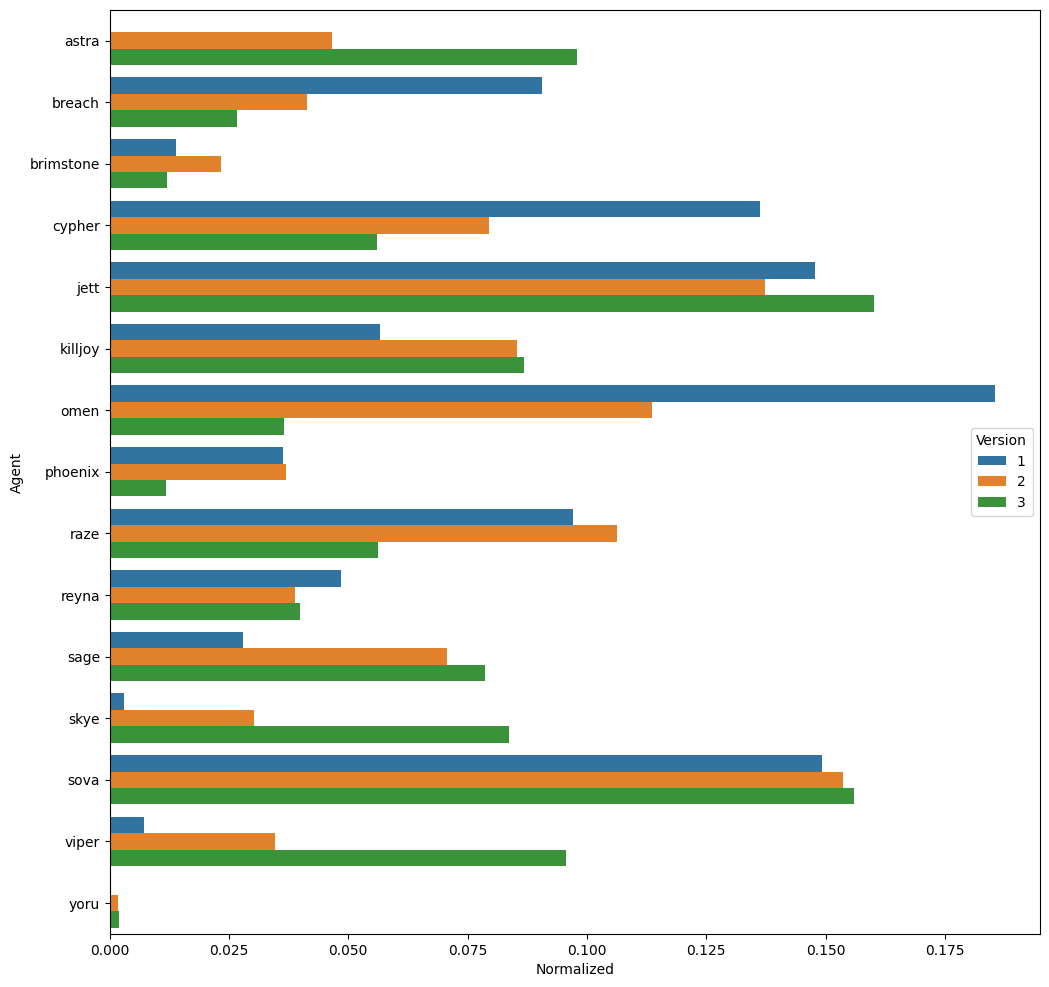

In [69]:
#@title Normalized Agent Usage

#@markdown However, when the count is normalized, Jett's usage does not show a real increase in patch 2. Brimstone and Reyna also have fluctuating usage.
#@markdown Yoru is not a very popular agent, as its usage remains low even in patch 3.

sum_patch = agent_df['Version'].value_counts()
normalized_df = agent_df.groupby(by=['Agent', 'Version'], as_index=False).count()
normalized_df['Normalized'] = normalized_df.apply(lambda row: row['GameID']/sum_patch[row['Version']], axis=1)

fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(data=normalized_df, y='Agent', x='Normalized', hue='Version')
plt.show()

### Conclussion

Some agents have experienced increased or decreased popularity among players. These changes are likely due to buffs and nerfs that make some agents more powerful than others. For example, Viper and Astra usage has increased, while Omen usage has drastically decreased for the Controller role. This trend is also evident in the Sentinel role, where Sage and Killjoy have gained more popularity, while Cypher has seen a decline.

## How is the distribution of ACS values for each agent used? Do different map selections also result in different ACS value distributions?

In [ ]:
df_clean_score.Agent.unique()

array(['jett', 'chamber', 'sova', 'viper', 'skye', 'astra', 'raze',
       'sage', 'kayo', 'killjoy', 'reyna', 'cypher', 'breach', 'omen',
       'brimstone', 'phoenix', 'yoru'], dtype=object)

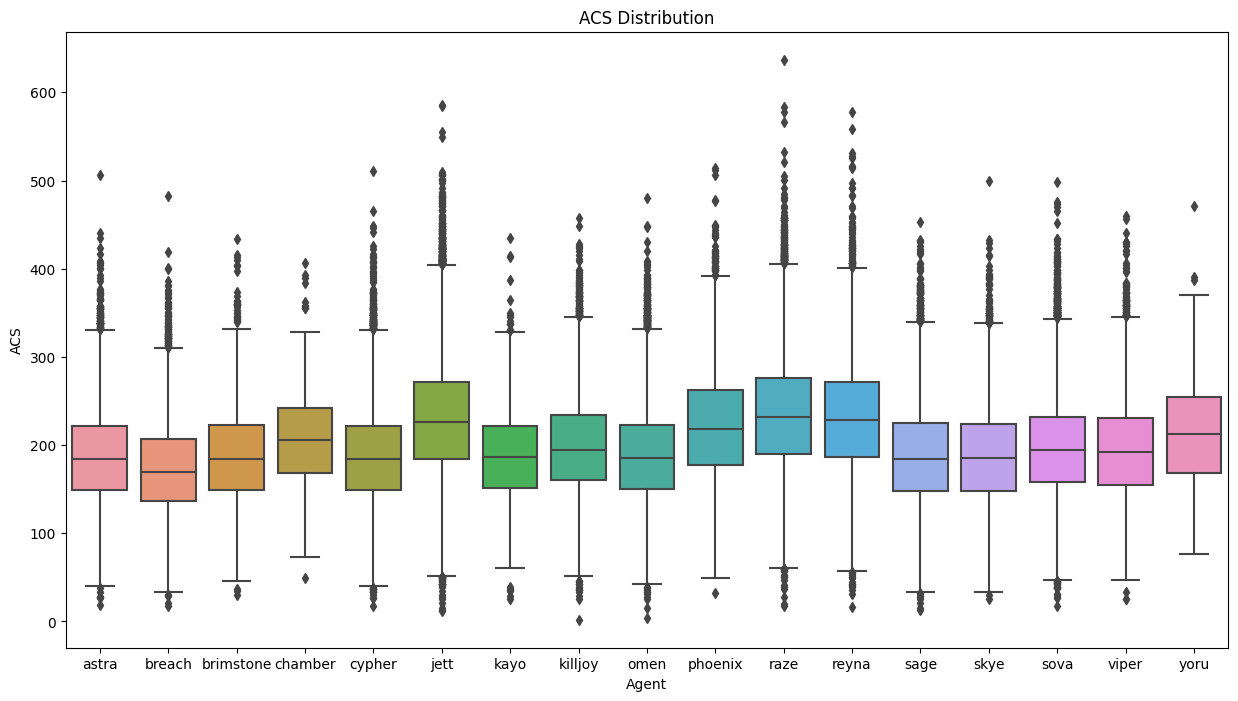


Top 5 Agent


,ACS
Agent,
raze,234.844017
reyna,230.482453
jett,229.895245
phoenix,221.311655
yoru,212.940594


In [77]:
#@title ACS Distribution

#@markdown The top five agents with the highest average ACS score are all duelists. This is likely because duelists typically play as carries and have more kills than other roles.
fig, ax = plt.subplots(figsize=(15, 8))

# drawing the plot
sns.boxplot(data=df_clean_score.sort_values(by='Agent'), x='Agent', y='ACS').set_title("ACS Score Distribution")
plt.show()
print()
print("Top 5 Agent")
display(df_clean_score[['Agent', 'ACS']].groupby(by='Agent').mean().sort_values('ACS', ascending=False).head(5))

In [ ]:
df_clean_games.Map.unique()

array(['Breeze', 'Bind', 'Haven', 'Icebox', 'Ascent', 'Split', 'Fracture'],
      dtype=object)

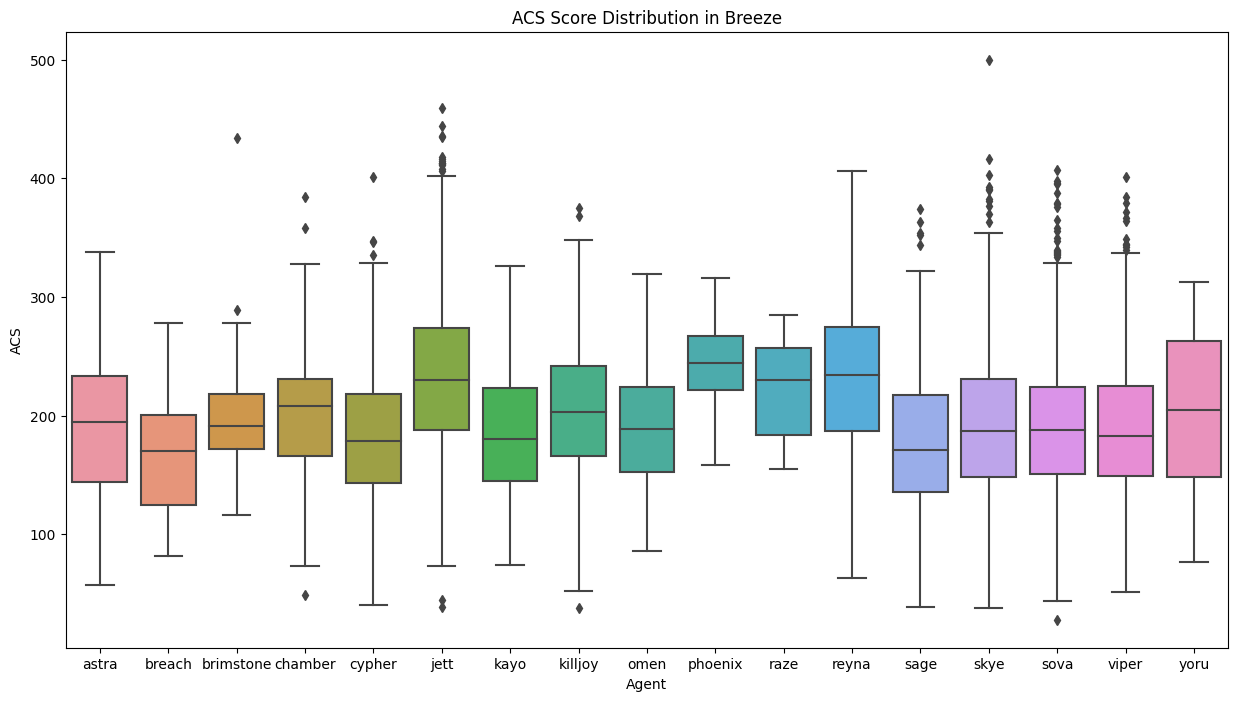


Top 5 Agent


,ACS
Agent,
phoenix,242.789474
jett,233.062397
reyna,231.520408
raze,221.714286
chamber,206.084746


------------------------------


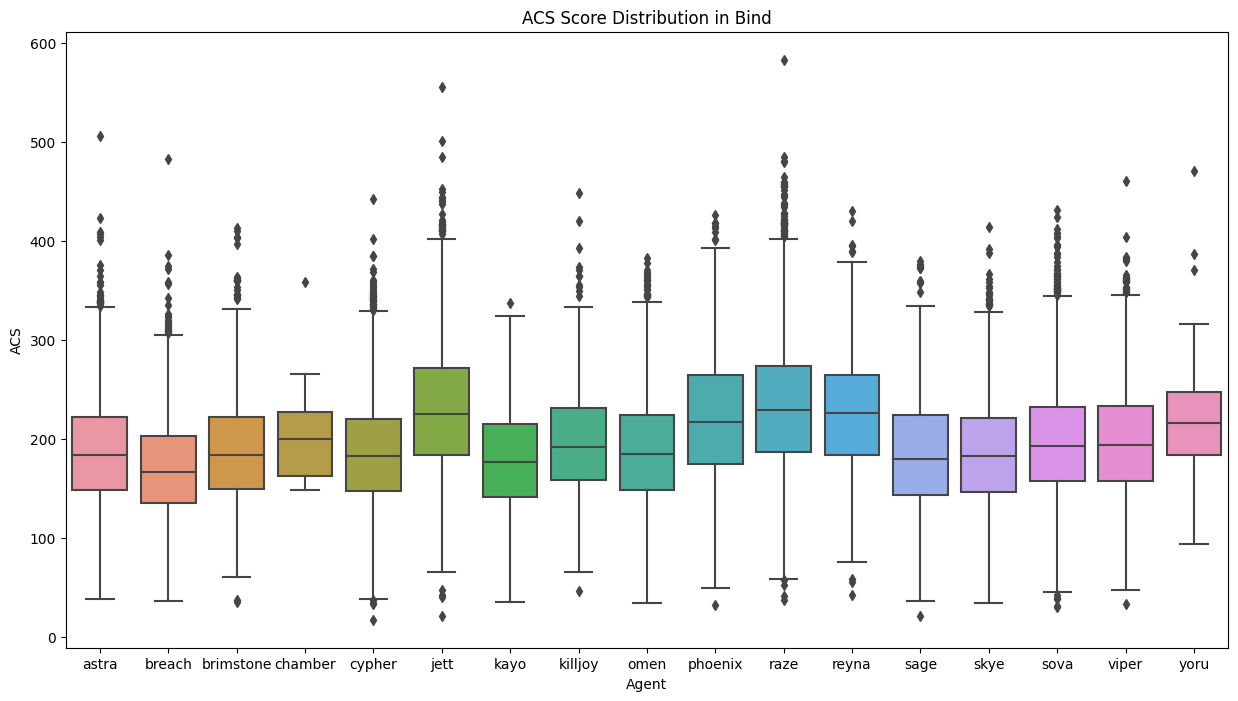


Top 5 Agent


,ACS
Agent,
raze,232.012840
jett,229.100519
reyna,226.105185
phoenix,220.947608
yoru,219.600000


------------------------------


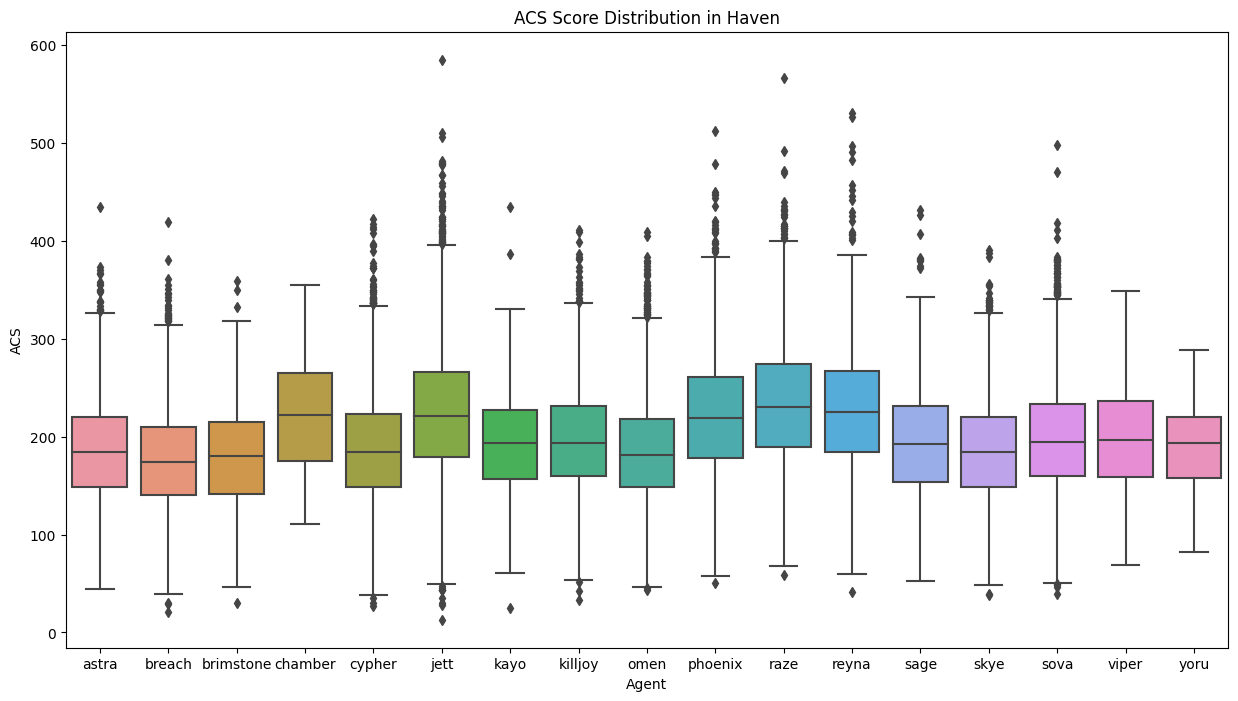


Top 5 Agent


,ACS
Agent,
raze,234.458384
reyna,227.506014
jett,224.089442
chamber,221.344828
phoenix,220.954293


------------------------------


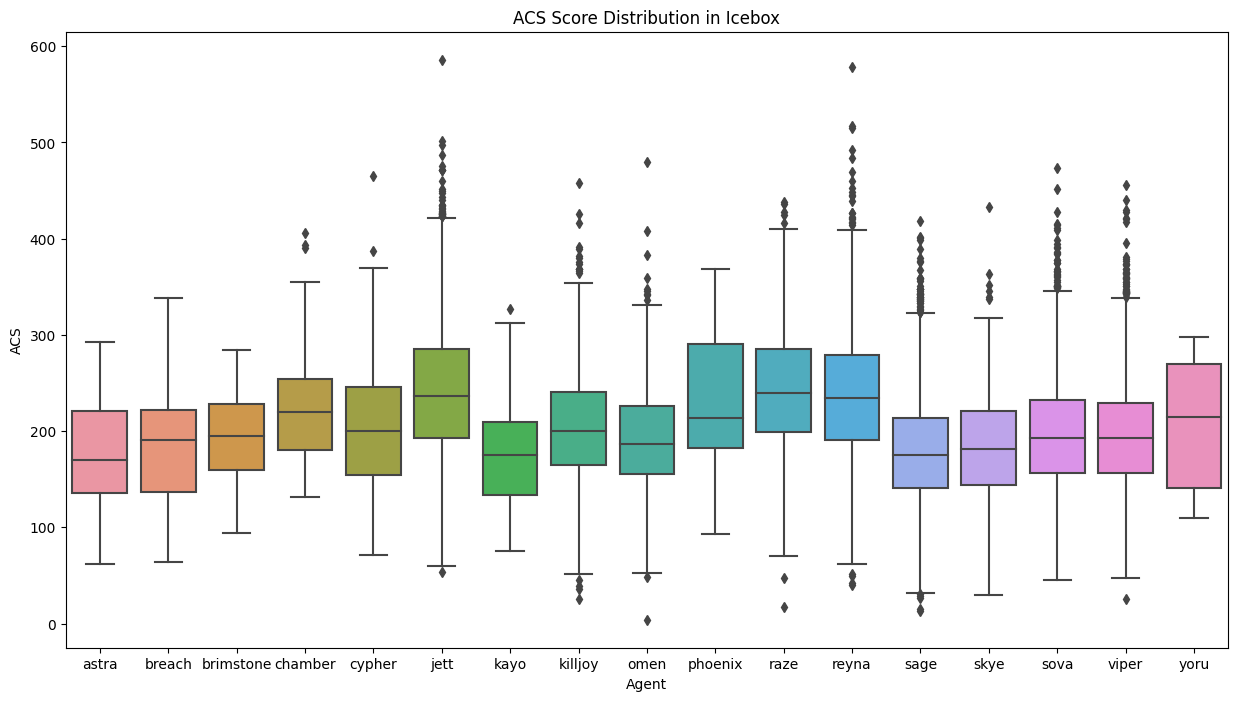


Top 5 Agent


,ACS
Agent,
raze,242.310559
jett,241.449280
reyna,236.360276
phoenix,230.895833
chamber,226.312500


------------------------------


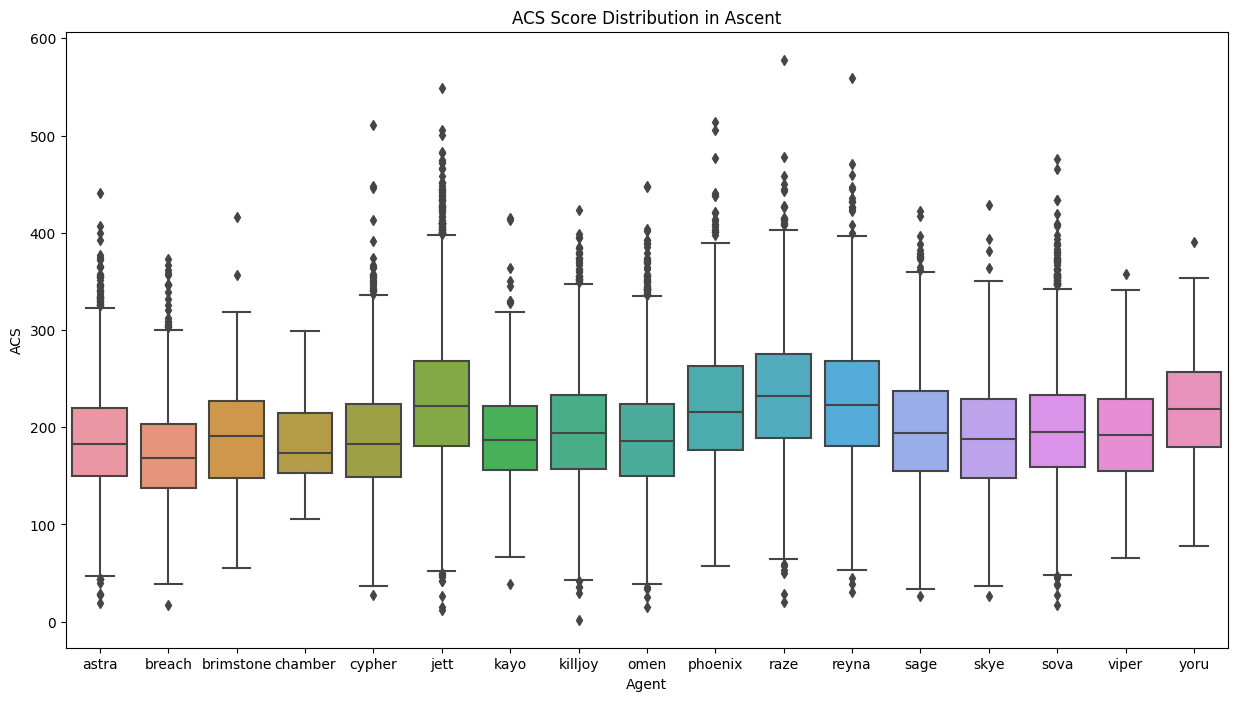


Top 5 Agent


,ACS
Agent,
raze,232.162694
jett,226.593313
reyna,226.010778
yoru,225.548387
phoenix,221.956882


------------------------------


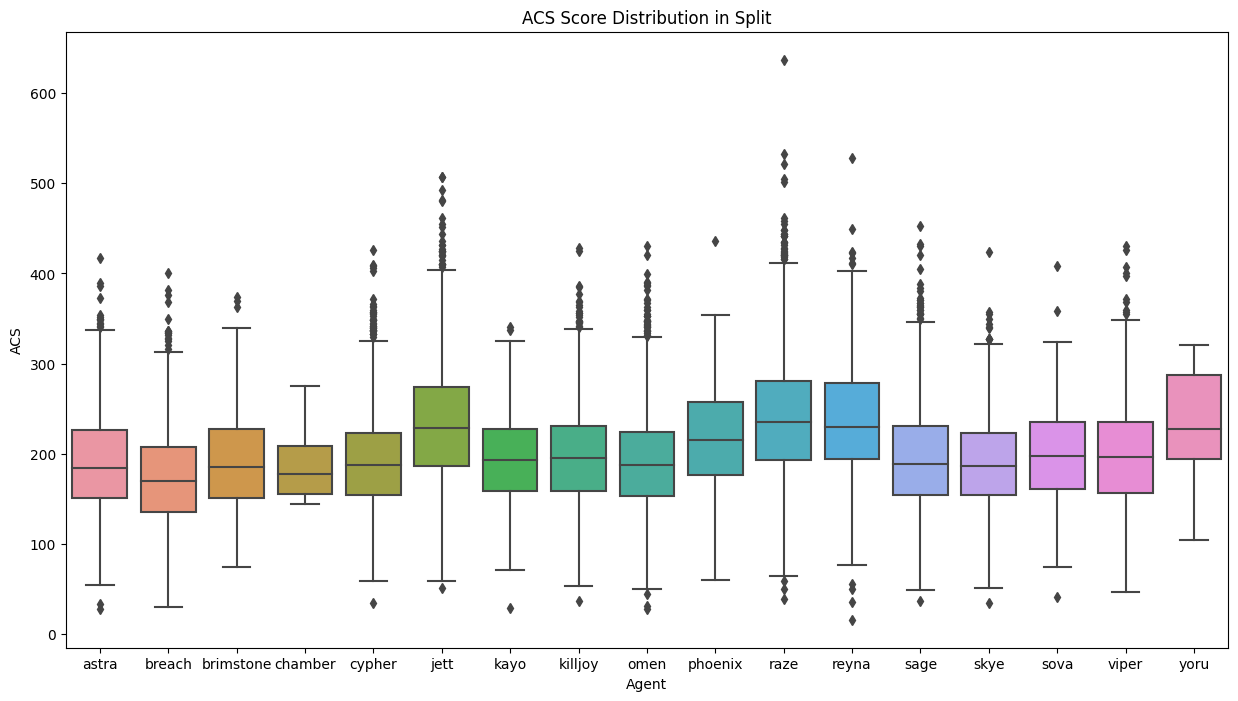


Top 5 Agent


,ACS
Agent,
raze,238.531952
reyna,236.019490
jett,232.268079
yoru,226.230769
phoenix,216.228188


------------------------------


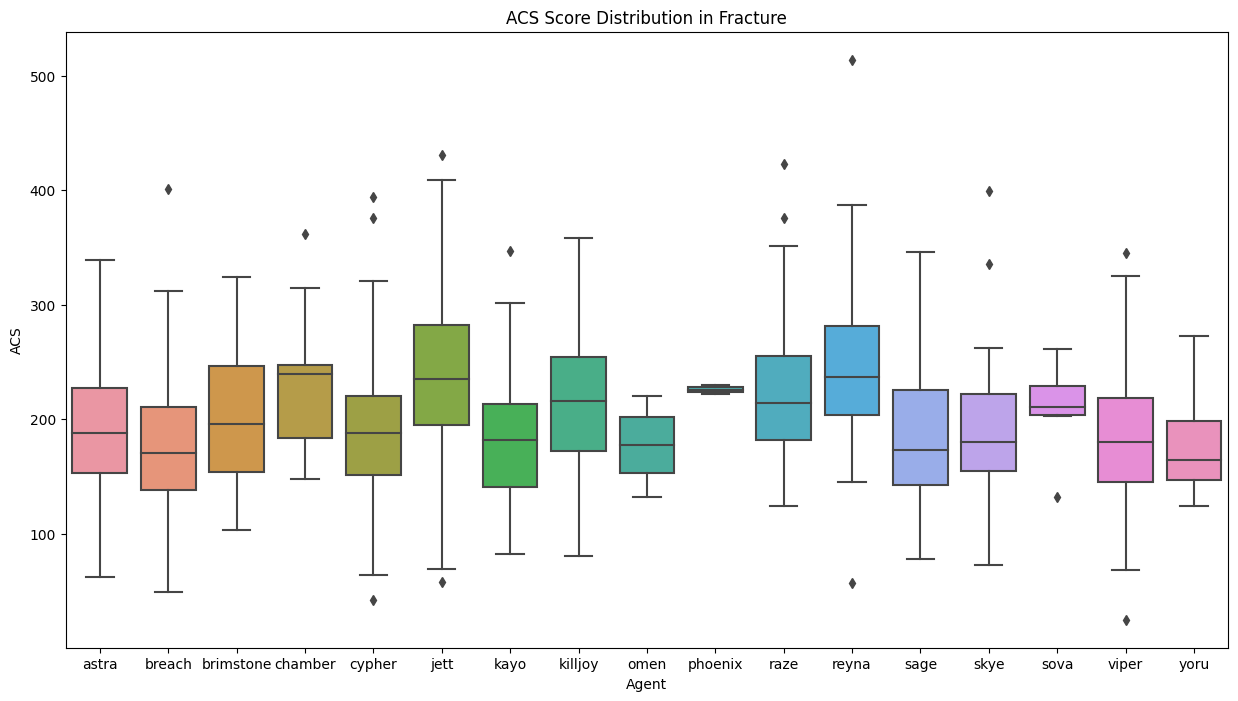


Top 5 Agent


,ACS
Agent,
reyna,246.343750
jett,238.303448
chamber,229.000000
phoenix,226.000000
raze,225.133333


------------------------------


In [80]:
#@title ACS Distribution in Each Map

#@markdown This issue is carried out on each map as well.
#@markdown The top five highest average ACS scores for each agent are dominated by duelists,
#@markdown with Raze having the highest average ACS on five of the seven available maps.

for i in df_clean_games.Map.unique():
  temp = df_clean_games[df_clean_games['Map'] == i]
  temp2 = df_clean_score[df_clean_score['GameID'].isin(temp.GameID)]

  fig, ax = plt.subplots(figsize=(15, 8))
  # drawing the plot
  sns.boxplot(data=temp2.sort_values(by='Agent'), x='Agent', y='ACS').set_title(f"ACS Score Distribution in {i}")
  plt.show()

  print()
  print("Top 5 Agent")
  display(temp2[['Agent', 'ACS']].groupby(by='Agent').mean().sort_values('ACS', ascending=False).head(5))
  print("------------------------------")

### Conclussion

On average, duelist agents have higher ACS scores than other roles. This is also true on each map, with Raze having the highest average ACS score. This trend is likely due to how ACS is calculated in Valorant, which considers both damage inflicted and kills. Given that duelist agents are specialized in these areas, this finding is not surprising.

## Which team has the highest winning count in the tournament?

In [ ]:
df_matches.EventStage.unique()

array(['Group Stage: Decider (A)', 'Group Stage: Decider (C)',
       "Group Stage: Winner's (A)", ..., 'Tournament: Lower Round 1 ',
       'Week 1: Group A', 'Week 1: Group B'], dtype=object)

In [82]:
#@title Find Final Matches
final = df_matches[df_matches['EventStage'].str.contains('Grand Final') & ~df_matches['EventStage'].str.contains('Qualifier')]
display(final.EventStage.unique())
display(final.head(3))

array(['Playoffs: Grand Final', 'Round 1: Grand Final',
       'Playoffs: Grand Finals', 'Main Event: Grand Final',
       'Grand Final: Grand Finals', 'Grand Final: Grand Final',
       'Week 8: Grand Final', 'Tournament : Grand Final',
       'Wildcard: Grand Final', 'India: Grand Finals',
       'Pakistan and Afghanistan: Grand Finals',
       'Main Event: Grand Finals', 'Finals: Grand Final',
       'Tournament: Grand Final', 'North Africa: Grand Final',
       'Superfinal: Grand Final', 'Main Event: Grand Final ',
       'Tournament: Grand Finals', 'North Africa: Grand Finals',
       'Main Event: LAN: Grand Final', 'Main Event: LAS: Grand Finals',
       'Levant and Egypt: Grand Finals', 'GCC and Iraq: Grand Finals',
       'Main Event: LAN: Grand Finals', 'Main Event: LAS: Grand Final',
       'Main Event: LAS: Group B Grand Final',
       'Main Event: LAN: Grand Final (B)',
       'Main Event: LAN: Grand Final (A)',
       'Main Event: LAS: Grand Final (B)',
       'Main Event:

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
23,61811,2022-01-04 23:25:00,Patch 3.12,825,Nerd Street Gamers Winter Championship - Open 12,Playoffs: Grand Final,642,6817,Luminosity,ex-FLICKBAITERS,2,1
29,51964,2022-01-04 12:00:00,Patch 3.10,768,ESTAZ Valorant Elite League,Playoffs: Grand Final,1470,1471,NASR Esports,Team RA'AD,3,1
50,61407,2021-12-30 21:00:00,Patch 3.12,819,Knights Monthly Gauntlet: December,Playoffs: Grand Final,6461,6817,Akrew,ex-FLICKBAITERS,2,0


In [84]:
#@title Get Winning Team
def get_winner(row):
  if row['Team1_MapScore'] > row['Team2_MapScore']:
    return row['Team1']
  else:
    return row['Team2']
final['Winner'] = final.apply(lambda row: get_winner(row), axis=1)
final.head(3)

<ipython-input-84-26229de7b5f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Winner'] = final.apply(lambda row: get_winner(row), axis=1)


,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore,Winner
23,61811,2022-01-04 23:25:00,Patch 3.12,825,Nerd Street Gamers Winter Championship - Open 12,Playoffs: Grand Final,642,6817,Luminosity,ex-FLICKBAITERS,2,1,Luminosity
29,51964,2022-01-04 12:00:00,Patch 3.10,768,ESTAZ Valorant Elite League,Playoffs: Grand Final,1470,1471,NASR Esports,Team RA'AD,3,1,NASR Esports
50,61407,2021-12-30 21:00:00,Patch 3.12,819,Knights Monthly Gauntlet: December,Playoffs: Grand Final,6461,6817,Akrew,ex-FLICKBAITERS,2,0,Akrew


In [92]:
#@title Show team with highes winning count with tournament names
display(final.groupby('Winner').count().sort_values('MatchID', ascending=False)[['Date']].rename(columns={'Date':'Win Championship'}).head(1))
display(list(final[final['Winner'] == "BIG"].EventName.unique()))

,Win Championship
Winner,
BIG,10


['Kingdom Calling #6',
 'Kingdom Calling #5',
 'FEL Valorant Cup #3',
 'A1 eSports VALORANT Cup #2',
 'Kingdom Calling #4',
 'Kingdom Calling #3',
 'EURAT Valorant Vengeance Series',
 'A1 eSports VALORANT Cup',
 'EURAT Valorant Vanquisher Series',
 'LVL Clash Regional #1']

## Which team composition is more likely to win a game?

In [93]:
#@title Get Winning Team in Each Games
def get_winning_team(row):
  if row['Winner'] == 1:
    return row['Team1']
  else:
    return row['Team2']
df_clean_games['Winning Name'] = df_clean_games.apply(lambda row: get_winning_team(row), axis=1)
df_clean_games.head(3)

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Winning Name
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7,Booster Seat Gaming
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13,Pho Real
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8,Booster Seat Gaming


In [96]:
#@title Aggregate Usage Agent From Winning Team
team_df = df_clean_score.sort_values(by=['GameID', 'TeamName', 'Agent']).groupby(by=['GameID', 'TeamName'], as_index=False).agg({'Agent':' '.join})
merged = df_clean_games[['GameID', 'Winning Name']].merge(team_df)
winner = merged[merged['Winning Name'] == merged['TeamName']]
winner[['TeamName', 'Agent']].head(3)

,TeamName,Agent
0,Booster Seat Gaming,chamber jett skye sova viper
3,Pho Real,astra raze sage skye viper
4,Booster Seat Gaming,astra chamber jett skye sova


In [97]:
#@title Top 5 Best Team Composition Based on Winning Teams
#@markdown From this sample, Sova and Jett are always used in top 5 team compositions.
winner_count = winner.groupby(by='Agent', as_index=False).count().sort_values(by = 'GameID', ascending=False)
winner_count = winner_count.drop(columns=['Winning Name', 'TeamName'])
winner_count = winner_count.rename(columns={'GameID':'Winning Games'})
winner_count.head(5)

,Agent,Winning Games
521,cypher jett omen raze sova,544
642,jett killjoy sage sova viper,536
682,jett reyna sage sova viper,478
302,breach cypher jett omen sova,476
517,cypher jett omen phoenix sova,463


# Modeling

## Split Dataset

In [136]:
df_matches

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,62403,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,62391,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,62396,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,62401,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (C),7045,7046,Salt and Vinegar,Bjor's Kittens,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7813,10,2020-05-02 15:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,11,smoke,Obey Alliance,1,0
7814,12,2020-05-02 15:00:00,NaN,2,Valhalla Invitational,Week 1: Group B,10,8,Highground,JSD,1,0
7815,8,2020-05-02 14:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,6,smoke,Orgless,1,0
7816,7,2020-05-02 13:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,5,smoke,Last Minute Heroes,1,0


In [137]:
from sklearn.model_selection import train_test_split

temp = df_matches.copy()
temp['Patch'] = temp['Patch'].fillna('Other')
temp['Version'] = 0
for i in range(1,4):
  temp.loc[temp['Patch'].str.contains(f'Patch {i}.'), 'Version'] = i

matches_train, matches_test = train_test_split(temp, random_state=42, test_size = 0.1, stratify=temp.Version)

games_train = df_clean_games[df_clean_games.MatchID.isin(matches_train.MatchID)]
games_test = df_clean_games[df_clean_games.MatchID.isin(matches_test.MatchID)]

score_train = df_clean_score[df_clean_score.GameID.isin(games_train.GameID)]
score_test = df_clean_score[df_clean_score.GameID.isin(games_test.GameID)]

## Make classifier model to classify what Agent is used for each players

In [138]:
df_clean_score.Agent.unique()

array(['jett', 'chamber', 'sova', 'viper', 'skye', 'astra', 'raze',
       'sage', 'kayo', 'killjoy', 'reyna', 'cypher', 'breach', 'omen',
       'brimstone', 'phoenix', 'yoru'], dtype=object)

In [11]:
#@title Create Role feature for each players
role_dict = {'duelists' : ['jett', 'phoenix', 'reyna', 'raze', 'yoru', 'neon'],
'controllers' : ['brimstone', 'omen', 'viper', 'astra', 'harbor'],
'initiators' : ['sova', 'breach', 'skye', 'kayo', 'fade', 'gekko'],
'sentinels' : ['cypher', 'sage', 'killjoy', 'chamber']}

In [140]:
score_train['Role'] = -1
for idx, role in enumerate(role_dict.values()):
  score_train.loc[score_train.Agent.isin(role), 'Role'] = idx
score_train.head(2)

<ipython-input-140-e420f60512c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_train['Role'] = -1


,GameID,PlayerName,TeamName,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses,Role
0,60894,Reduxx,Booster Seat Gaming,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0
1,60894,ChurmZ,Booster Seat Gaming,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0,3


In [141]:
score_test['Role'] = -1
for idx, role in enumerate(role_dict.values()):
  score_test.loc[score_test.Agent.isin(role), 'Role'] = idx
score_test.head(2)

<ipython-input-141-516f27fe1bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_test['Role'] = -1


,GameID,PlayerName,TeamName,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses,Role
560,60684,Reduxx,ex-FLICKBAITERS,jett,308.0,29.0,24.0,4.0,5.0,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0
561,60684,Verno,ex-FLICKBAITERS,sage,183.0,16.0,19.0,20.0,-3.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,3.0,1.0,3


### Single Label Approach

In [142]:
X_train = score_train.drop(columns=['Agent'])
X_test = score_test.drop(columns=['Agent'])
y_train = score_train[['Agent']]
y_test = score_test[['Agent']]

In [143]:
#@title Encode Agent Name
from sklearn import preprocessing
le_agent = preprocessing.LabelEncoder()
y_train['Agent'] = le_agent.fit_transform(y_train['Agent'])
y_test['Agent'] = le_agent.transform(y_test['Agent'])

<ipython-input-143-327be3c84457>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Agent'] = le_agent.fit_transform(y_train['Agent'])
<ipython-input-143-327be3c84457>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Agent'] = le_agent.transform(y_test['Agent'])


In [144]:
#@title Add Version as feature
X_train['Version'] = 0
X_test['Version'] = 0
for i in range(1,4):
  patch = df_clean_matches[df_clean_matches['Patch'].str.contains(f'Patch {i}.')]
  games = df_clean_games[df_clean_games['MatchID'].isin(patch.MatchID)]
  X_train.loc[X_train['GameID'].isin(games.GameID), 'Version'] = i
  X_test.loc[X_test['GameID'].isin(games.GameID), 'Version'] = i

In [145]:
#@title Add Map as Feature and Encode Categorical Data
X_train = X_train.merge(games_train[['GameID', 'Map']])
X_test = X_test.merge(games_test[['GameID', 'Map']])
for i in ['PlayerName', 'TeamName']:
  le = preprocessing.LabelEncoder()
  le.fit_transform(df_clean_score[i])
  X_train[i] = le.transform(X_train[i])
  X_test[i] = le.transform(X_test[i])

le = preprocessing.LabelEncoder()
le.fit_transform(df_clean_games['Map'])
X_train['Map'] = le.transform(X_train['Map'])
X_test['Map'] = le.transform(X_test['Map'])

In [146]:
X_train = X_train.drop(columns=['GameID'])
X_test = X_test.drop(columns=['GameID'])

#### Modelling

In [147]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report

In [148]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_agent.classes_))

              precision    recall  f1-score   support

       astra       0.61      0.66      0.63       710
      breach       0.78      0.56      0.65       712
   brimstone       0.56      0.18      0.27       254
     chamber       0.50      0.12      0.20        16
      cypher       0.72      0.78      0.75      1202
        jett       0.69      0.86      0.77      2132
        kayo       0.50      0.11      0.18       118
     killjoy       0.72      0.74      0.73      1142
        omen       0.76      0.82      0.79      1489
     phoenix       0.57      0.28      0.38       375
        raze       0.68      0.68      0.68      1230
       reyna       0.59      0.30      0.40       583
        sage       0.81      0.71      0.75       944
        skye       0.65      0.50      0.57       620
        sova       0.78      0.93      0.85      2211
       viper       0.78      0.78      0.78       769
        yoru       0.00      0.00      0.00        23

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_agent.classes_))

              precision    recall  f1-score   support

       astra       0.52      0.56      0.54       710
      breach       0.47      0.47      0.47       712
   brimstone       0.26      0.26      0.26       254
     chamber       0.00      0.00      0.00        16
      cypher       0.58      0.56      0.57      1202
        jett       0.59      0.57      0.58      2132
        kayo       0.14      0.17      0.16       118
     killjoy       0.56      0.57      0.57      1142
        omen       0.72      0.69      0.71      1489
     phoenix       0.18      0.20      0.19       375
        raze       0.48      0.47      0.47      1230
       reyna       0.20      0.22      0.21       583
        sage       0.57      0.59      0.58       944
        skye       0.36      0.34      0.35       620
        sova       0.72      0.73      0.73      2211
       viper       0.68      0.70      0.69       769
        yoru       0.00      0.00      0.00        23

    accuracy              

In [150]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_agent.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       astra       0.00      0.00      0.00       710
      breach       0.00      0.00      0.00       712
   brimstone       0.00      0.00      0.00       254
     chamber       0.00      0.00      0.00        16
      cypher       0.14      0.03      0.05      1202
        jett       0.19      0.72      0.30      2132
        kayo       0.00      0.00      0.00       118
     killjoy       0.00      0.00      0.00      1142
        omen       0.17      0.10      0.12      1489
     phoenix       0.00      0.00      0.00       375
        raze       0.16      0.03      0.04      1230
       reyna       0.00      0.00      0.00       583
        sage       0.00      0.00      0.00       944
        skye       0.00      0.00      0.00       620
        sova       0.19      0.45      0.27      2211
       viper       0.00      0.00      0.00       769
        yoru       0.00      0.00      0.00        23

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## Create regression model that can find average ACS score for each team in one match. (Without using kill, death, assist, plusminus, and average damage features)

In [151]:
def combine_team_score(df, mode):
  temp = None
  if mode == 'sum':
    temp = df.fillna(0).groupby(by=['GameID', 'TeamName'], as_index=False, sort=False).sum()
  elif mode == 'mean':
    temp = df.fillna(0).groupby(by=['GameID', 'TeamName'], as_index=False, sort=False).mean()
  rows = []
  for i in range(0, len(temp), 2):
    row = []
    df_team = temp.iloc[i:i+2]
    first_row = df_team.iloc[0]
    row.extend(list(first_row[['GameID', 'TeamName']]))
    df_team = df_team.drop(columns=['GameID', 'TeamName'])
    for idx, j in df_team.iterrows():
      row.extend(list(j))
    rows.append(row)

  cols = ['GameID', 'TeamName']
  cols.extend([f"{k}_{i+1}" for i in range(2) for k in list(j.keys())])
  if mode == 'sum':
    return pd.DataFrame(rows, columns=cols).groupby(by='GameID', as_index=False, sort=False).sum()
  elif mode == 'mean':
    return pd.DataFrame(rows, columns=cols).groupby(by='GameID', as_index=False, sort=False).sum()

In [158]:
#@title Grouping and Merge From Scoreboard Data to be Match Data.
#@markdown This way, Average ACS score in one match can be found

grouped_score_train = combine_team_score(score_train, "mean")
combined_train = grouped_score_train.merge(games_train).merge(matches_train)
grouped_score_test = combine_team_score(score_test, "mean")
combined_test = grouped_score_test.merge(games_test).merge(matches_test)
combined_train.head(3)

<ipython-input-151-82ce385f08a9>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.fillna(0).groupby(by=['GameID', 'TeamName'], as_index=False, sort=False).mean()
<ipython-input-151-82ce385f08a9>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(rows, columns=cols).groupby(by='GameID', as_index=False, sort=False).sum()
<ipython-input-151-82ce385f08a9>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu

,GameID,ACS_1,Kills_1,Deaths_1,Assists_1,PlusMinus_1,ADR_1,HS_Percent_1,FirstKills_1,FirstDeaths_1,...,Team2_TotalRounds,Winning Name,Date,Patch,EventID,EventName,EventStage,Team1_MapScore,Team2_MapScore,Version
0,60894,212.8,15.8,10.8,4.6,5.0,140.0,23.0,2.8,1.2,...,7,Booster Seat Gaming,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),2,1,3
1,60895,156.2,7.6,13.8,1.8,-6.2,99.0,28.8,1.0,2.0,...,13,Pho Real,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),2,1,3
2,60896,190.6,14.2,14.6,6.6,-0.4,130.6,32.2,2.0,2.2,...,8,Booster Seat Gaming,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),2,1,3


In [159]:
combined_train.keys()

Index(['GameID', 'ACS_1', 'Kills_1', 'Deaths_1', 'Assists_1', 'PlusMinus_1',
       'ADR_1', 'HS_Percent_1', 'FirstKills_1', 'FirstDeaths_1',
       'FKFD_PlusMinus_1', 'Num_2Ks_1', 'Num_3Ks_1', 'Num_4Ks_1', 'Num_5Ks_1',
       'OnevOne_1', 'OnevTwo_1', 'OnevThree_1', 'OnevFour_1', 'OnevFive_1',
       'Econ_1', 'Plants_1', 'Defuses_1', 'Role_1', 'ACS_2', 'Kills_2',
       'Deaths_2', 'Assists_2', 'PlusMinus_2', 'ADR_2', 'HS_Percent_2',
       'FirstKills_2', 'FirstDeaths_2', 'FKFD_PlusMinus_2', 'Num_2Ks_2',
       'Num_3Ks_2', 'Num_4Ks_2', 'Num_5Ks_2', 'OnevOne_2', 'OnevTwo_2',
       'OnevThree_2', 'OnevFour_2', 'OnevFive_2', 'Econ_2', 'Plants_2',
       'Defuses_2', 'Role_2', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1',
       'Team2', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy',
       'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco',
       'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Winning Name',
       'Date', 'Patch', 'EventID', 'E

In [187]:
#@title Split Input and Target Feature and Also Drop Unimportant Feature
target = ['ACS_1', 'ACS_2']
dropped = ['MatchID', 'GameID', 'Date', 'Team1', 'Team2', 'EventID', 'EventName', \
           'ACS_1', 'Kills_1', 'Deaths_1', 'Assists_1', 'PlusMinus_1', 'ADR_1', \
           'ACS_2', 'Kills_2', 'Deaths_2', 'Assists_2', 'PlusMinus_2', 'ADR_2', \
           'EventStage', 'Winning Name', 'Patch'] + target
X_train = combined_train.drop(columns=dropped)
X_test = combined_test.drop(columns=dropped)
y_train = combined_train[target]
y_test = combined_test[target]

In [188]:
#@title Encode Map to Integer
from sklearn import preprocessing
le_agent = preprocessing.LabelEncoder()
all_combined = pd.concat([X_train, X_test])
for i in ['Map']:
  le = preprocessing.LabelEncoder()
  le.fit_transform(all_combined[i])
  X_train[i] = le.transform(X_train[i])
  X_test[i] = le.transform(X_test[i])


#### Modelling

In [189]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [190]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

60.51298700796201
7.767921287413156
0.9071782421460033


In [191]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

167.06171864171864
12.91348113875873
0.7428918671934654


In [192]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))print(r2_score(y_test, y_pred))

57.58355309864317
7.574768330226025
0.9118488775089904
